In [1]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint
import pandas as pd
import seaborn as sns
from IPython.display import display, Math, Latex
import re
import matplotlib.colors as mcolors

HOME_DIR = os.getcwd()

In [2]:
os.chdir(HOME_DIR)
os.chdir("../experiment_results/nominal_v_robust") 
files = ['uniform.csv', 
         'unimodal_1.csv', 'unimodal_2.csv', 'unimodal_3.csv', 'unimodal_4.csv', 
         'bimodal_1.csv', 'bimodal_2.csv', 'bimodal_3.csv', 'bimodal_4.csv', 'bimodal_5.csv', 'bimodal_6.csv',
         'trimodal_1.csv', 'trimodal_2.csv', 'trimodal_3.csv', 'trimodal_4.csv'
        ]

In [3]:
df = pd.read_csv(files[0])
df

,Epsilon,Robust Cost,Nominal Cost,Ideal Cost,Rho Multiplier,Rho (Expected),Rho (True),Workload (Perturbed),Workload (True)
0,0.05,0.872622,0.835284,0.735528,0.25,1.011524,0.694945,"Workload(z0=0.007973090212412562, z1=0.3554538...","Workload(z0=0.25, z1=0.25, q=0.25, w=0.25)"
1,0.05,0.872622,0.835284,0.735528,1.00,1.011524,0.694945,"Workload(z0=0.007973090212412562, z1=0.3554538...","Workload(z0=0.25, z1=0.25, q=0.25, w=0.25)"
2,0.05,0.872622,0.835284,0.735528,1.75,1.011524,0.694945,"Workload(z0=0.007973090212412562, z1=0.3554538...","Workload(z0=0.25, z1=0.25, q=0.25, w=0.25)"
3,0.10,0.741464,0.736288,0.735528,0.25,0.632230,0.013956,"Workload(z0=0.31936654798846187, z1=0.24837814...","Workload(z0=0.25, z1=0.25, q=0.25, w=0.25)"
4,0.10,0.807310,0.736288,0.735528,1.00,0.632230,0.013956,"Workload(z0=0.31936654798846187, z1=0.24837814...","Workload(z0=0.25, z1=0.25, q=0.25, w=0.25)"
...,...,...,...,...,...,...,...,...,...
295,0.95,0.735721,0.735528,0.735528,1.00,0.007439,0.000922,"Workload(z0=0.24290073052214162, z1=0.24994515...","Workload(z0=0.25, z1=0.25, q=0.25, w=0.25)"
296,0.95,0.736293,0.735528,0.735528,1.75,0.007439,0.000922,"Workload(z0=0.24290073052214162, z1=0.24994515...","Workload(z0=0.25, z1=0.25, q=0.25, w=0.25)"
297,1.00,0.735543,0.735533,0.735528,0.25,0.002163,0.000260,"Workload(z0=0.24650201265797156, z1=0.24317433...","Workload(z0=0.25, z1=0.25, q=0.25, w=0.25)"
298,1.00,0.735593,0.735533,0.735528,1.00,0.002163,0.000260,"Workload(z0=0.24650201265797156, z1=0.24317433...","Workload(z0=0.25, z1=0.25, q=0.25, w=0.25)"


In [4]:
palette = sns.color_palette("hls", 3)

def plot_rho_multiples_errors(filename, fig, ax, xmin=None, xmax=None, ymin=None, ymax=None):
    df = pd.read_csv(filename)
    name = filename.split('.')[0]
    name = name.replace('_', ' ')
    name = name.capitalize()
    df['Percent Change'] = (df['Robust Cost'] - df['Ideal Cost'])/df['Ideal Cost']
    percent_change = df.groupby(['Epsilon', 'Rho Multiplier'])['Percent Change'].apply(np.array).reset_index()
    percent_change['mean'] = percent_change['Percent Change'].apply(lambda x: x.mean())
    percent_change['error'] = percent_change['Percent Change'].apply(lambda x: x.std()/np.sqrt(len(x)))
    
    for i, mult in enumerate(percent_change['Rho Multiplier'].unique()): 
        selection = percent_change[percent_change['Rho Multiplier'] == mult]
        ax.errorbar(selection['Epsilon'].to_numpy(), selection['mean'].to_numpy(), yerr=selection['error'].to_numpy(), label=rf'Robust ($\,\rho \cdot ${mult})', color=palette[i])
    
    df['Percent Change Nom'] = (df['Nominal Cost'] - df['Ideal Cost'])/df['Ideal Cost']
    percent_change = df.groupby(['Epsilon'])['Percent Change Nom'].apply(np.array).reset_index()
    percent_change['mean'] = percent_change['Percent Change Nom'].apply(lambda x: x.mean())
    percent_change['error'] = percent_change['Percent Change Nom'].apply(lambda x: x.std()/np.sqrt(len(x)))
    ax.errorbar(percent_change['Epsilon'].to_numpy(), percent_change['mean'].to_numpy(), yerr=percent_change['error'].to_numpy(), label=rf'Nominal', color='orange')
    
    if xmin != None and xmax != None: 
        ax.set_xlim(xmin, xmax)
    if ymin != None and ymax != None: 
        ax.set_ylim(ymin, ymax)
        
    ax.axhline(y=0, color='black', linestyle="--", label="Nominal")
    ax.legend()
    ax.set_xlabel('Epsilon')
    ax.set_ylabel('Percent Change in Cost')
    title = name
    ax.set_title(title)

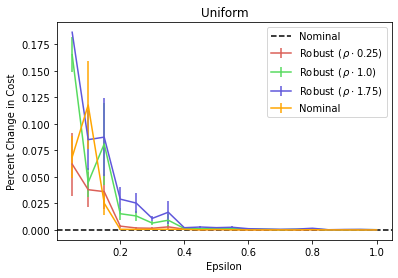

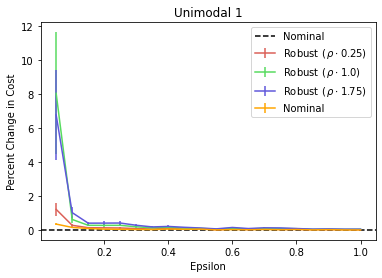

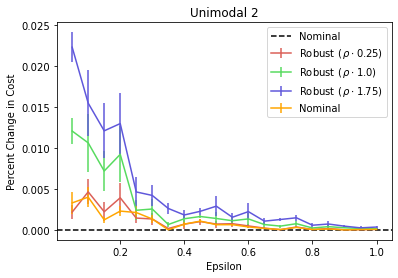

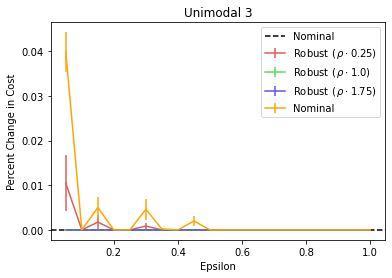

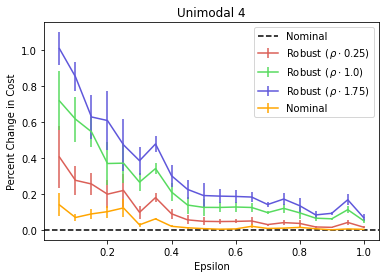

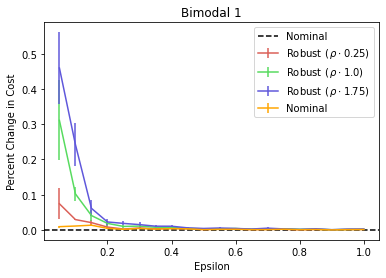

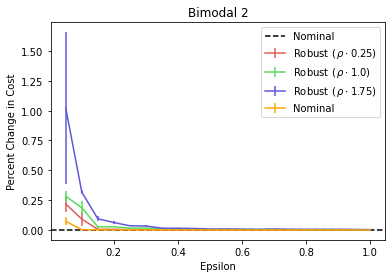

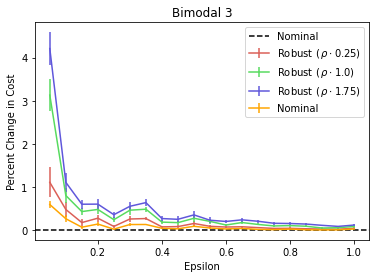

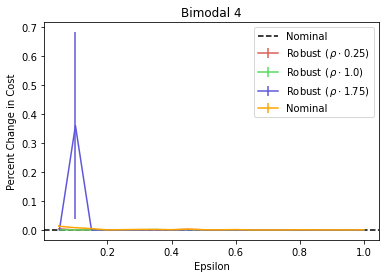

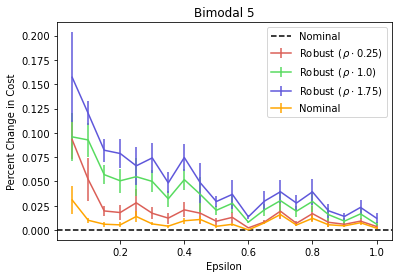

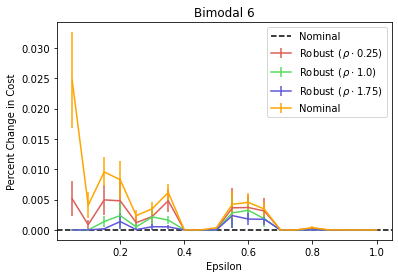

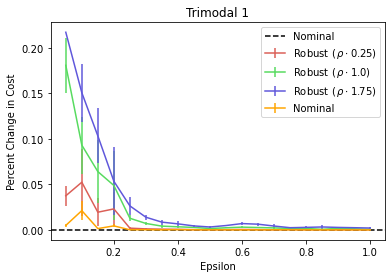

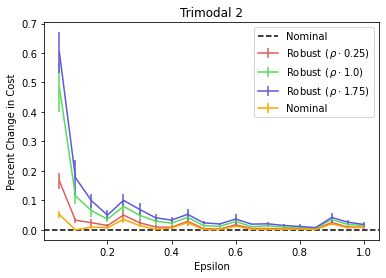

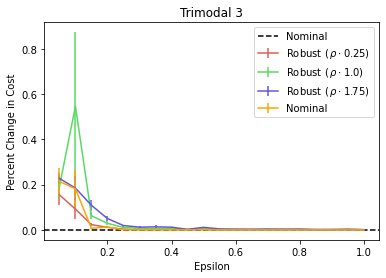

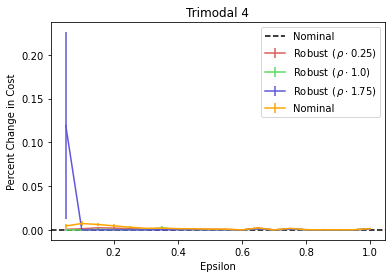

In [5]:
for file_num in range(len(files)): 
    fig, ax = plt.subplots(figsize=(6, 4)) 
    plot_rho_multiples_errors(files[file_num], fig, ax)
    filename_base = files[file_num].split('.')[0]
    fig.savefig(f"../../notebook/graphs/nominal_v_robust/{filename_base}_workloads_plot.png", dpi=300, bbox_inches='tight')
    plt.show()